In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [3]:
#importing csv file
data=pd.read_excel(r'C:\Users\Laptop\Downloads\New folder\flight_price_prediction_1.xlsx')
data.head()

,Unnamed: 0,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,0,Air Asia,12/11/2021,New Delhi,Mumbai,20:00,02:25\n+ 1 day,6h 25m,1 Stop,5953
1,1,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,06:45\n+ 1 day,9h 20m,1 Stop,5953
2,2,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,07:15\n+ 1 day,9h 50m,1 Stop,5953
3,3,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,06:45\n+ 1 day,10h 00m,1 Stop,5953
4,4,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,07:15\n+ 1 day,10h 30m,1 Stop,5953


In [4]:
#checking data set shape
data.shape

(3435, 10)

In [5]:
#checking for null values
data.isnull().sum()

Unnamed: 0         0
airline_name       0
date_of_journey    0
Source             0
Destination        0
depature_time      0
arrival_time       0
duration           0
total_stops        0
Price              0
dtype: int64

There are no null values

In [6]:
#checking datatypes
data.dtypes

Unnamed: 0          int64
airline_name       object
date_of_journey    object
Source             object
Destination        object
depature_time      object
arrival_time       object
duration           object
total_stops        object
Price               int64
dtype: object

Price is an integer type and all other are object type

In [7]:
#checking for stats
data.describe()

,Unnamed: 0,Price
count,3435.000000,3435.000000
mean,1717.000000,7935.366812
std,991.743414,3779.496341
min,0.000000,1604.000000
25%,858.500000,5179.000000
50%,1717.000000,7424.000000
75%,2575.500000,10248.000000
max,3434.000000,36530.000000


The average Price of flight is 7935, and max price is 36530.

In [8]:
#lets drop the unwanted column
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [9]:
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,Air Asia,12/11/2021,New Delhi,Mumbai,20:00,02:25\n+ 1 day,6h 25m,1 Stop,5953
1,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,06:45\n+ 1 day,9h 20m,1 Stop,5953
2,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,07:15\n+ 1 day,9h 50m,1 Stop,5953
3,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,06:45\n+ 1 day,10h 00m,1 Stop,5953
4,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,07:15\n+ 1 day,10h 30m,1 Stop,5953


In [10]:
#splitting the arrivalcolumn which has string data
data['arrival_time']=data['arrival_time'].str.split(expand=True)
data['arrival_time']

0       02:25
1       06:45
2       07:15
3       06:45
4       07:15
        ...  
3430    10:50
3431    10:50
3432    10:50
3433    10:50
3434    17:05
Name: arrival_time, Length: 3435, dtype: object

In [11]:
#checking the dataset
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,Air Asia,12/11/2021,New Delhi,Mumbai,20:00,02:25,6h 25m,1 Stop,5953
1,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,06:45,9h 20m,1 Stop,5953
2,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,07:15,9h 50m,1 Stop,5953
3,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,06:45,10h 00m,1 Stop,5953
4,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,07:15,10h 30m,1 Stop,5953


In [12]:
data['arrival_time'].value_counts()

20:55    86
09:05    80
19:15    67
22:50    62
21:15    58
         ..
04:45     1
04:40     1
12:20     1
00:55     1
13:10     1
Name: arrival_time, Length: 221, dtype: int64

In [13]:
data['Source'].value_counts()

Delhi            891
Bangalore        680
Hyderabad        564
New Delhi        492
Pune             282
Cochin           259
Kolkata          256
HYD Hyderabad      5
DEL Delhi          2
PNQ Pune           2
BLR Bangalore      1
COK Cochin         1
Name: Source, dtype: int64

In [14]:
data['Destination'].value_counts()

Mumbai           1624
Bangalore        1326
Cochin            282
Chennai           192
BOM Mumbai          5
BLR Bangalore       4
COK Cochin          2
Name: Destination, dtype: int64

In [15]:
data['total_stops'].value_counts()

1-stop        1083
 1 Stop(s)    1005
 2 Stop(s)     348
1 Stop         342
Non-Stop       210
non-stop       188
Non Stop       136
2+-stop         95
2 Stop(s)       13
 3 Stop(s)      12
 4 Stop(s)       2
3 Stop(s)        1
Name: total_stops, dtype: int64

# Feature Engineering

In [17]:
#replacing the airline names with the repeated data
data['airline_name'] = data['airline_name'].replace(['Indigo','Air India','Go First','AirAsia India','Air Asia'],['IndiGo','AirIndia','GO FIRST','AirAsia','AirAsia'])
#replacing the source with the repeated data
data['Source'] = data['Source'].replace(['New Delhi','BLR Bangalore','DEL Delhi','HYD Hyderabad','PNQ Pune','COK Cochin'],['Delhi','Bangalore','Delhi','Hyderabad','Pune','Cochin'])
#replacing the Destination with repeated data
data['Destination'] = data['Destination'].replace(['BOM Mumbai','BLR Bangalore','COK Cochin'],['Mumbai','Bangalore','cochin'])

In [23]:
#replacing stops with count
data['total_stops'] = data['total_stops'].replace(['1-stop',' 1 Stop(s)','1 Stop'],1)
data['total_stops'] = data['total_stops'].replace(['2 Stop(s)','2+-stop','2 Stop(s)'],2)
data['total_stops'] = data['total_stops'].replace(['3 Stop(s)','3 Stop(s)'],3)
data['total_stops'] = data['total_stops'].replace(['4 Stop(s)'],4)
data['total_stops'] = data['total_stops'].replace(['Non-Stop','non-stop','Non Stop'],0)

In [24]:
data['total_stops'].value_counts()

1    2430
0     534
2     456
3      13
4       2
Name: total_stops, dtype: int64

In [25]:
#converting departure time into hours,minutes and seconds
data['Dep_hour'] = pd.to_datetime(data['depature_time']).dt.hour
data['Dep_minute'] = pd.to_datetime(data['depature_time']).dt.minute

In [26]:
#converting arriving time into hours, minute and seconds
data['arr_hour'] = pd.to_datetime(data['arrival_time']).dt.hour
data['arr_minute'] = pd.to_datetime(data['arrival_time']).dt.minute

In [27]:
#converting the duration column 
duration  = list(data['duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+'0m'
        else:
            duration[i] = '0h'+ duration[i]
duration_hours =[]
duration_mins =[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [28]:
#Equating the hours and minutes of duration column
data['duration_hours']=duration_hours
data['duration_mins']=duration_mins

In [30]:
#Converting the date of journey columns into day month and year 
#Converting the date of journey columns into day month and year 
data['date_of_Journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.day
data['month_of_journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.month
data['year_of_journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.year

In [31]:
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,year_of_journey
0,AirAsia,12/11/2021,Delhi,Mumbai,20:00,02:25,6h 25m,1,5953,20,0,2,25,6,25,12,11,2021
1,AirAsia,12/11/2021,Delhi,Mumbai,21:25,06:45,9h 20m,1,5953,21,25,6,45,9,20,12,11,2021
2,AirAsia,12/11/2021,Delhi,Mumbai,21:25,07:15,9h 50m,1,5953,21,25,7,15,9,50,12,11,2021
3,AirAsia,12/11/2021,Delhi,Mumbai,20:45,06:45,10h 00m,1,5953,20,45,6,45,10,0,12,11,2021
4,AirAsia,12/11/2021,Delhi,Mumbai,20:45,07:15,10h 30m,1,5953,20,45,7,15,10,30,12,11,2021


In [33]:
#dropping the columns which are converted
data.drop(columns=['date_of_journey','year_of_journey','depature_time','arrival_time','duration'],axis=1,inplace=True)

In [34]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,AirAsia,Delhi,Mumbai,1,5953,20,0,2,25,6,25,12,11
1,AirAsia,Delhi,Mumbai,1,5953,21,25,6,45,9,20,12,11
2,AirAsia,Delhi,Mumbai,1,5953,21,25,7,15,9,50,12,11
3,AirAsia,Delhi,Mumbai,1,5953,20,45,6,45,10,0,12,11
4,AirAsia,Delhi,Mumbai,1,5953,20,45,7,15,10,30,12,11


# Visualization

<Figure size 7200x3600 with 0 Axes>

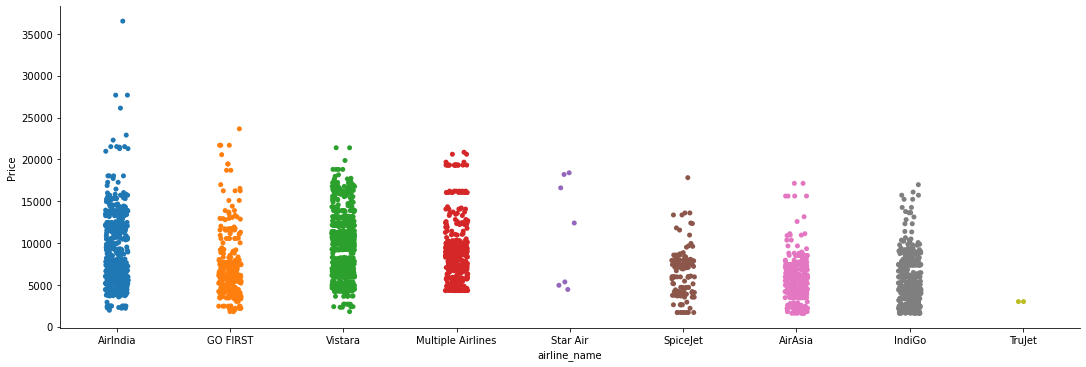

In [35]:
#lets plot on the categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(y='Price',x='airline_name',data=data.sort_values('Price',ascending=False),height=5,aspect=3)
plt.show()

<Figure size 72000x3600 with 0 Axes>

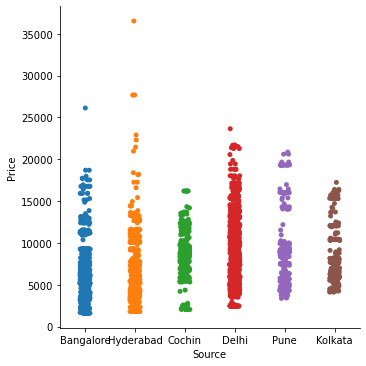

In [39]:
#lets plot the categorical column and check the data
plt.figure(figsize=(1000,50))
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending='False'))
plt.show()

<Figure size 72000x36000 with 0 Axes>

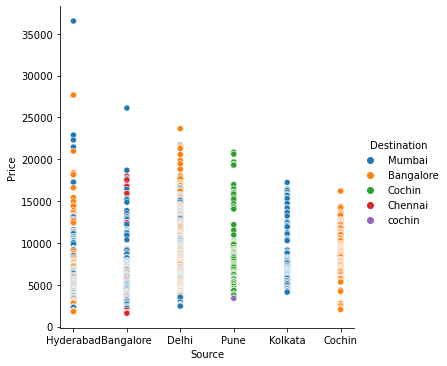

In [42]:
#lets plot on the categorical column on data
plt.figure(figsize=(1000,500))
sns.relplot(x = 'Source',y ='Price',hue='Destination',data=data.sort_values('Price',ascending=False))
plt.show()

<Figure size 72000x36000 with 0 Axes>

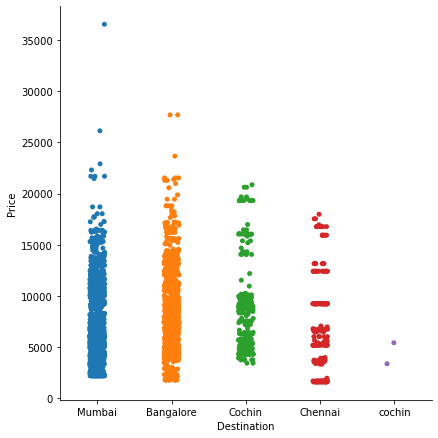

In [43]:
#lets plot on the catergorical column and check the data
plt.figure(figsize=(1000,500))
sns.catplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False),height=6)
plt.show()

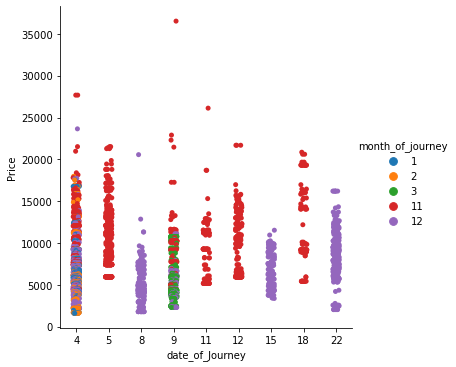

In [47]:
sns.catplot(x='date_of_Journey',y='Price',hue='month_of_journey',data=data.sort_values('Price',ascending=False))

Travelling on 9th of November the flight fares are high because the flight fares will be high, as the date of journey is near.

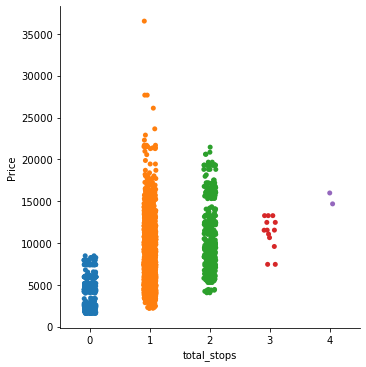

In [48]:
sns.catplot(x='total_stops',y='Price',data = data.sort_values('Price',ascending=False))

Choosing one stop flights results in high fare.

<AxesSubplot:xlabel='Dep_hour', ylabel='Density'>

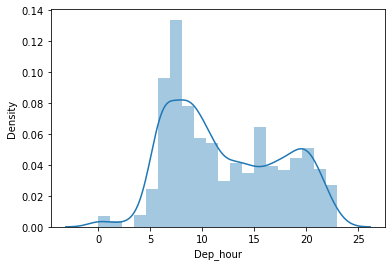

In [49]:
#Dist plot
sns.distplot(data['Dep_hour'])

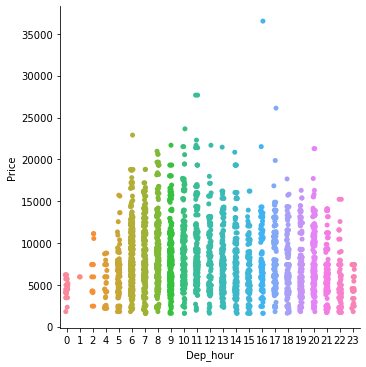

In [50]:
sns.catplot(x='Dep_hour',y='Price',data=data.sort_values('Price',ascending=False))

# HistoGram Plots

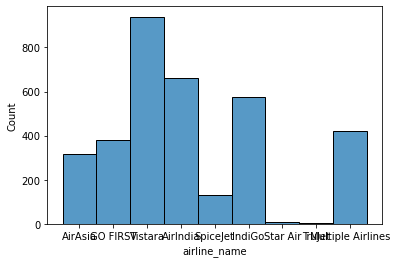

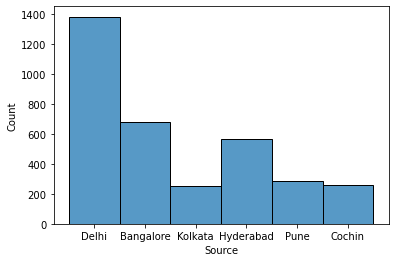

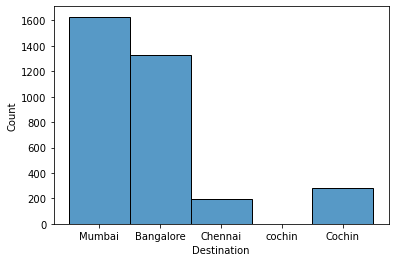

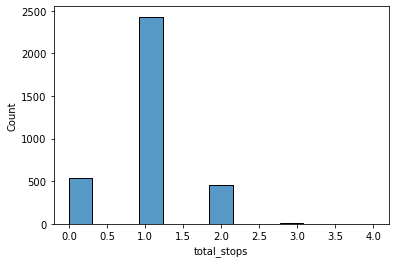

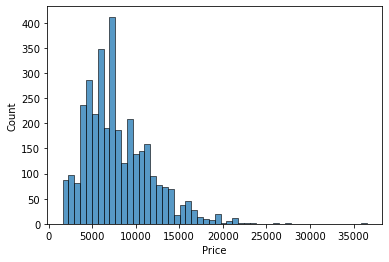

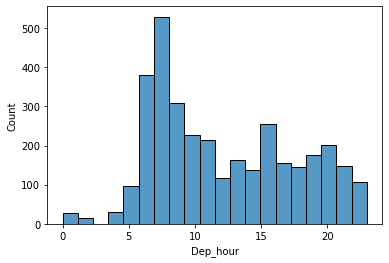

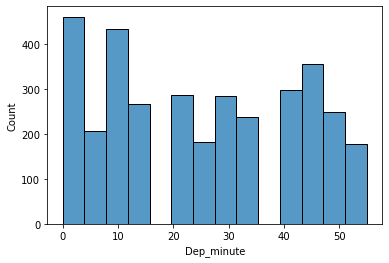

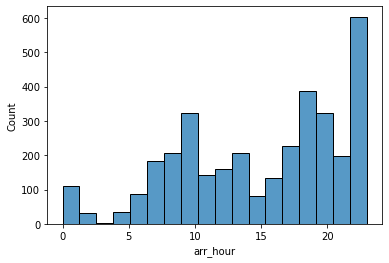

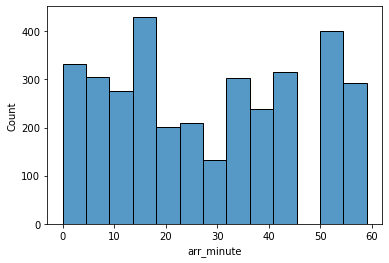

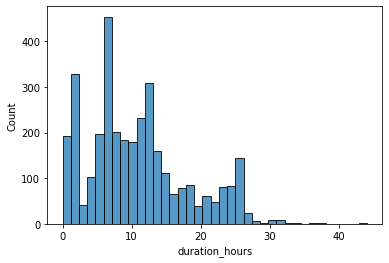

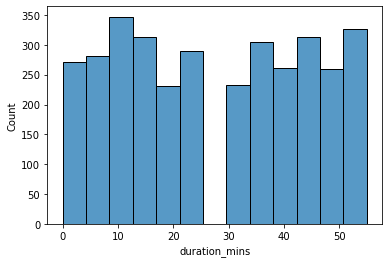

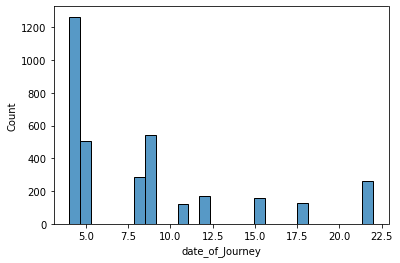

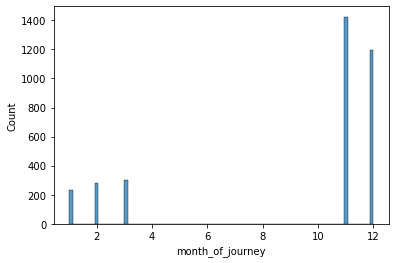

In [51]:
for i in data.columns:
    sns.histplot(data[i])
    plt.show()

In [52]:
#checking for categorical columns
cat_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        cat_col.append(i)
cat_col        

['airline_name', 'Source', 'Destination']

In [55]:
#checking for numerical columns
num_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        num_col.append(i)
num_col

['total_stops',
 'Price',
 'Dep_hour',
 'Dep_minute',
 'arr_hour',
 'arr_minute',
 'duration_hours',
 'duration_mins',
 'date_of_Journey',
 'month_of_journey']

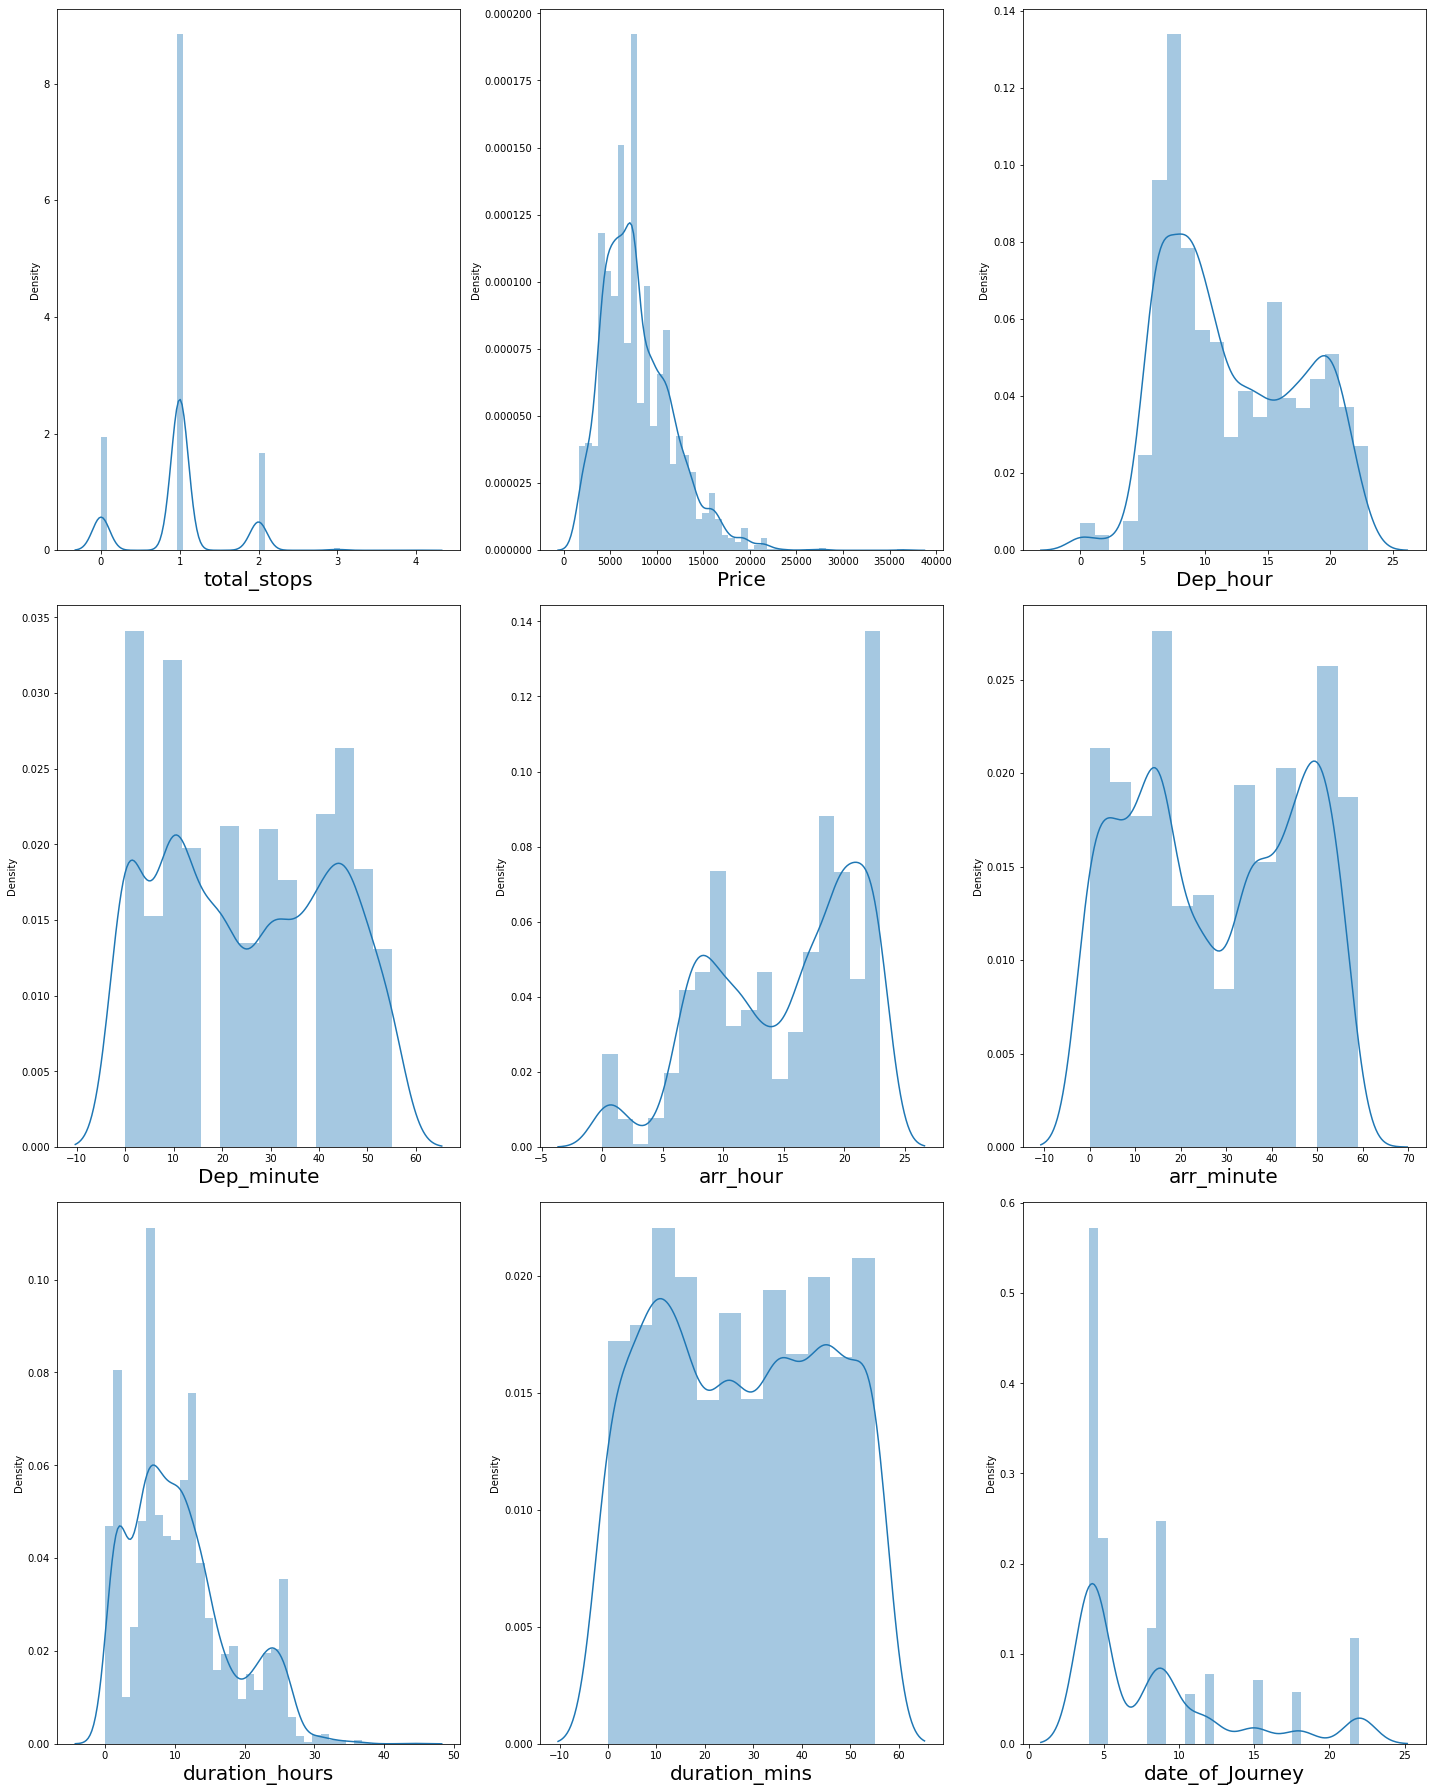

In [57]:
#Now lets plot dist plot and visualise how the data is distributed in each column
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

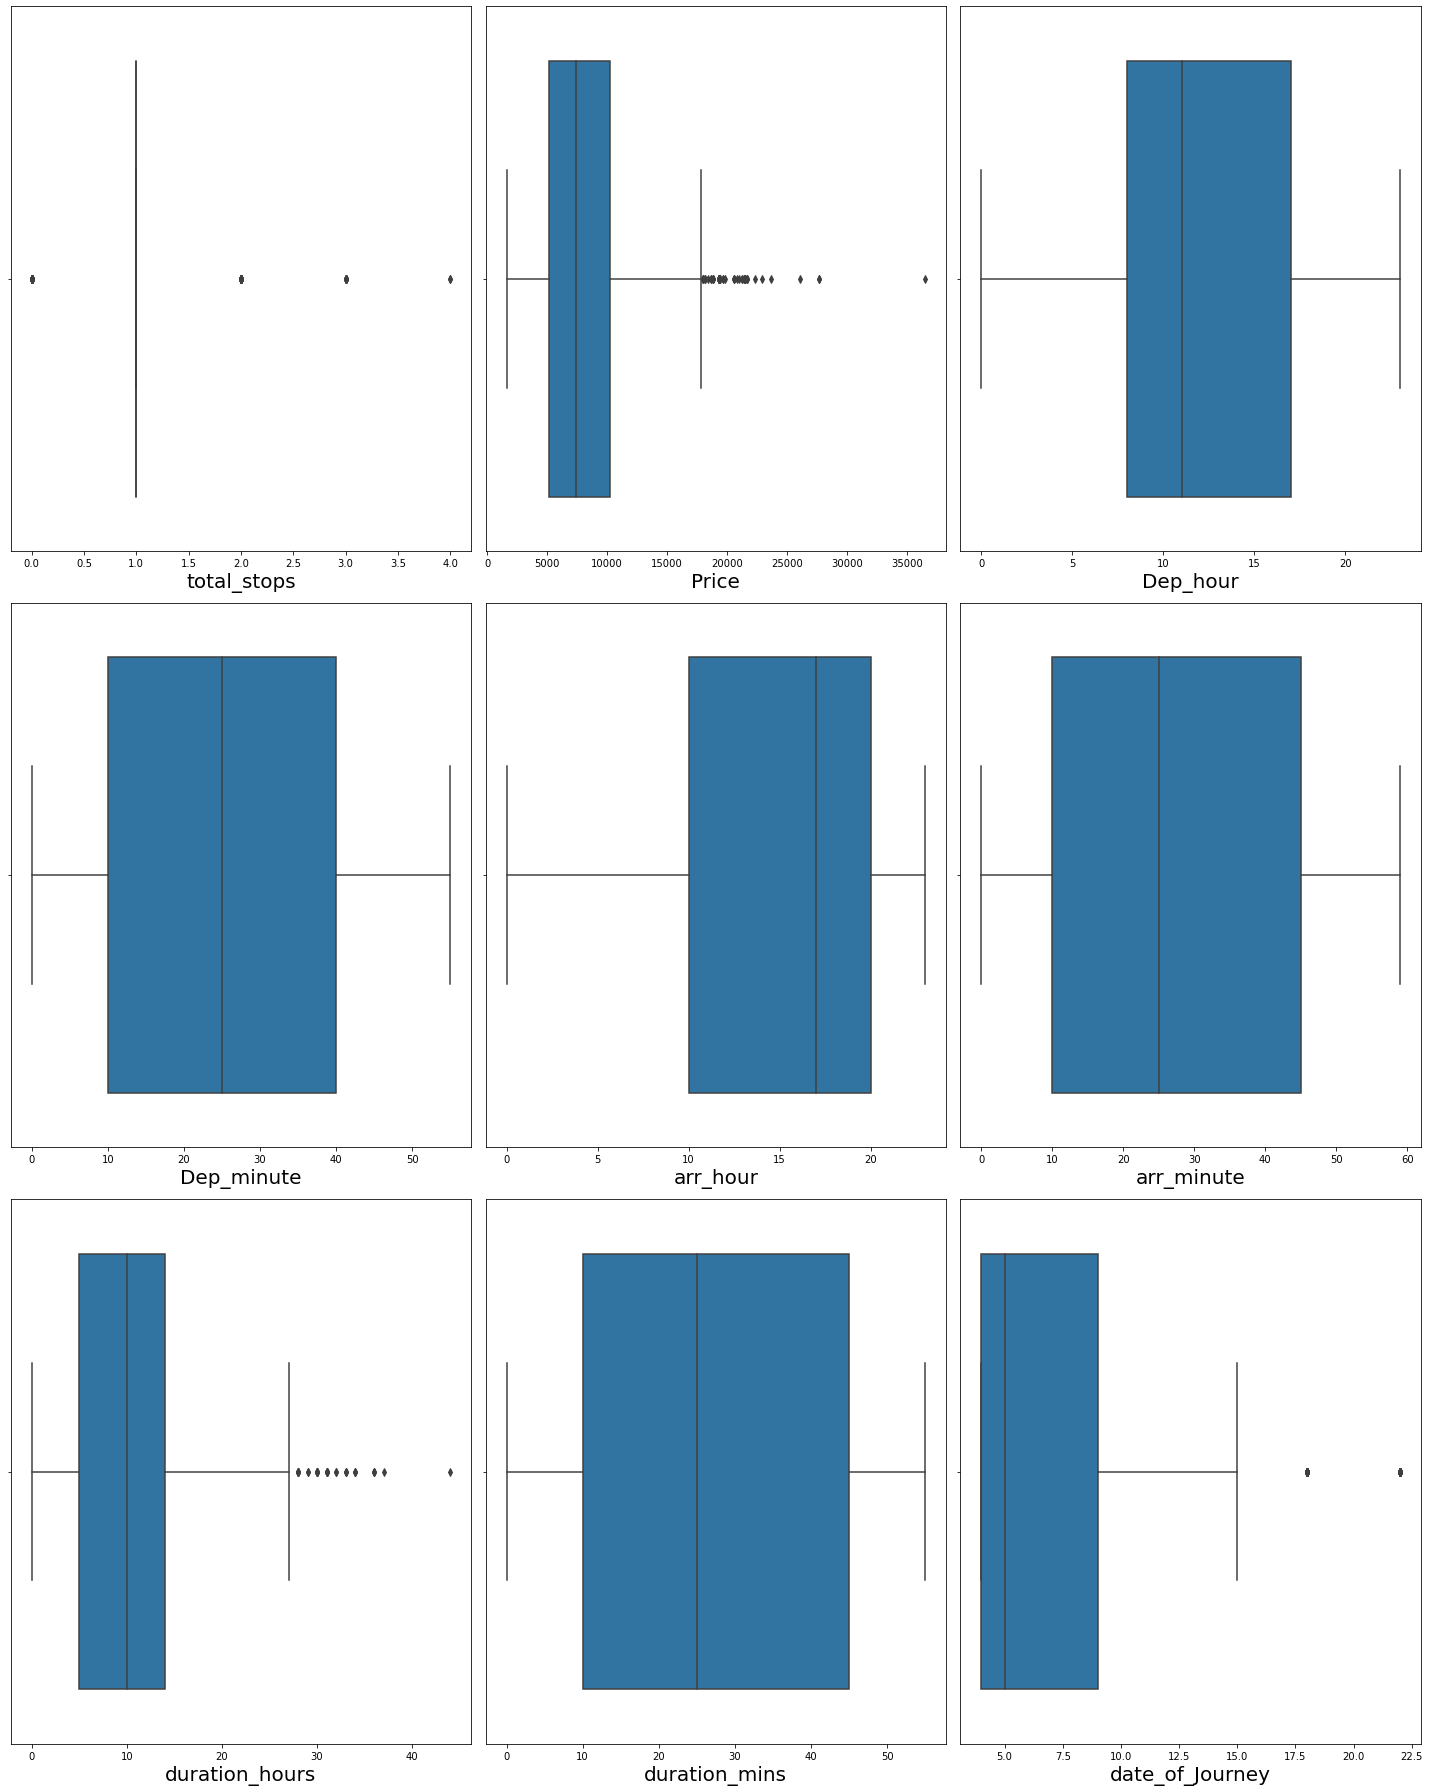

In [58]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is some skewness present in the columns

# Z_Score

In [59]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove our outiers using z_score
z=np.abs(stats.zscore(data[num_col]))#abs=absolute numberprint(z)
print(z)

[[0.02411392 0.52458192 1.46527533 ... 0.14654874 0.68470835 0.43859878]
 [0.02411392 0.52458192 1.65241174 ... 0.43221151 0.68470835 0.43859878]
 [0.02411392 0.52458192 1.65241174 ... 1.2817651  0.68470835 0.43859878]
 ...
 [1.82479445 2.18913762 0.59322513 ... 0.71787428 2.5359269  0.68659661]
 [1.82479445 2.18913762 0.59322513 ... 0.71787428 2.5359269  0.68659661]
 [1.82479445 2.18913762 0.5295933  ... 1.57486259 2.5359269  0.68659661]]


In [60]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [  80  167  168  169  488  489  490  491  670  671  672  673  674  825
  832  836  839  848 1043 1316 1702 1709 1715 1750 1751 1799 1919 1921
 1936 1937 1938 2035 2036 2163 2164 2169 2172 2181 2345 2764 2768 2769
 2770 2771 3046 3134 3139 3154 3155 3156 3157 3158 3159 3160 3161 3162
 3163 3164 3165 3166 3167 3168 3169 3170 3171 3172 3173 3174 3378 3384]


In [61]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [62]:
data.shape

(3365, 13)

In [63]:
#Checking for the % of dataloss
loss_percent=(3435-3365)/1470*100
loss_percent

4.761904761904762

In [64]:
data.reset_index()

,index,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,0,AirAsia,Delhi,Mumbai,1,5953,20,0,2,25,6,25,12,11
1,1,AirAsia,Delhi,Mumbai,1,5953,21,25,6,45,9,20,12,11
2,2,AirAsia,Delhi,Mumbai,1,5953,21,25,7,15,9,50,12,11
3,3,AirAsia,Delhi,Mumbai,1,5953,20,45,6,45,10,0,12,11
4,4,AirAsia,Delhi,Mumbai,1,5953,20,45,7,15,10,30,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,3430,Multiple Airlines,Cochin,Bangalore,2,16208,13,45,10,50,21,5,22,12
3361,3431,Multiple Airlines,Cochin,Bangalore,2,16208,13,45,10,50,21,5,22,12
3362,3432,Multiple Airlines,Cochin,Bangalore,2,16208,9,35,10,50,25,15,22,12
3363,3433,Multiple Airlines,Cochin,Bangalore,2,16208,9,35,10,50,25,15,22,12


In [65]:
# As Airline is Nominal Categorical data we will use OneHotEncoding to convert the data

Airlines = pd.get_dummies(data['airline_name'],drop_first=True)

Airlines.head()

,AirIndia,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,TruJet,Vistara
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [66]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = pd.get_dummies(data['Source'], drop_first= True)
Source.head()

,Cochin,Delhi,Hyderabad,Kolkata,Pune
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [67]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(data['Destination'], drop_first= True)
Destination.head()

,Chennai,Cochin,Mumbai,cochin
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [68]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,AirAsia,Delhi,Mumbai,1,5953,20,0,2,25,6,25,12,11
1,AirAsia,Delhi,Mumbai,1,5953,21,25,6,45,9,20,12,11
2,AirAsia,Delhi,Mumbai,1,5953,21,25,7,15,9,50,12,11
3,AirAsia,Delhi,Mumbai,1,5953,20,45,6,45,10,0,12,11
4,AirAsia,Delhi,Mumbai,1,5953,20,45,7,15,10,30,12,11


In [69]:
data=pd.concat([data,Airlines,Source,Destination],axis=1)

In [70]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,AirIndia,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,TruJet,Vistara,Cochin,Delhi,Hyderabad,Kolkata,Pune,Chennai,Cochin,Mumbai,cochin
0,AirAsia,Delhi,Mumbai,1,5953,20,0,2,25,6,25,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,AirAsia,Delhi,Mumbai,1,5953,21,25,6,45,9,20,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,AirAsia,Delhi,Mumbai,1,5953,21,25,7,15,9,50,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,AirAsia,Delhi,Mumbai,1,5953,20,45,6,45,10,0,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,AirAsia,Delhi,Mumbai,1,5953,20,45,7,15,10,30,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [71]:
#dropping the columns which are encoded
data.drop(columns=['airline_name','Source','Destination'],axis=1,inplace=True)

# Heat Map

<AxesSubplot:>

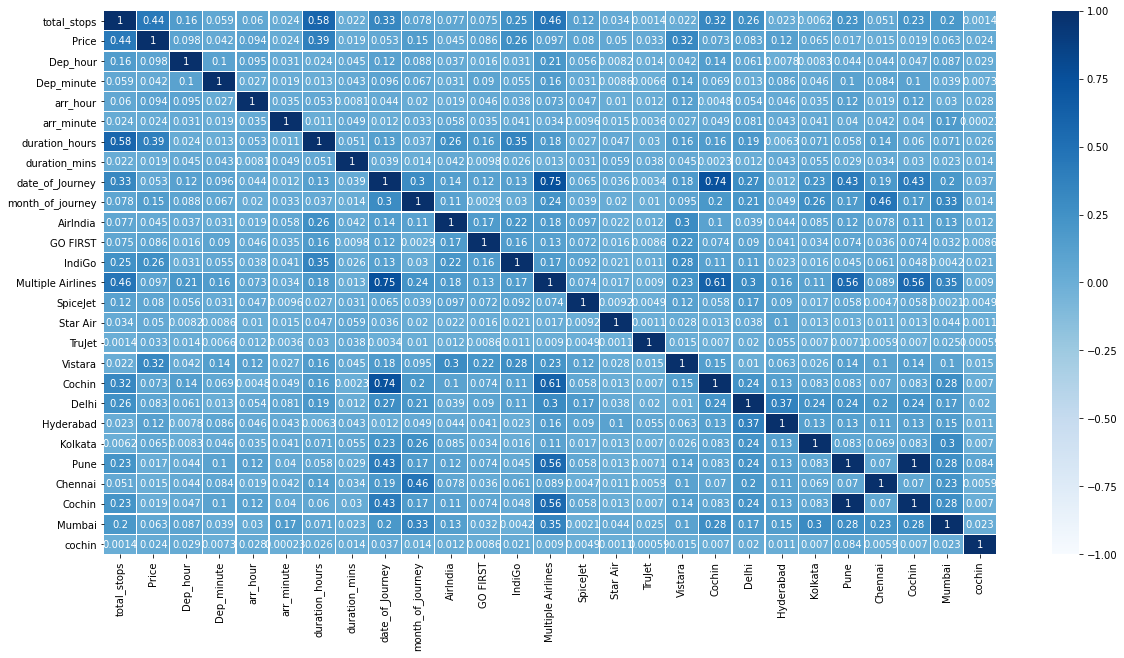

In [72]:
#checking for collinearity
data_corr=data.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,cmap='Blues',vmin=-1,vmax=1,annot=True,fmt='.2g',linewidth=0.1,center=0)

In [73]:
#seperating label and features in x and y variables
x=data.drop(columns=['Price'],axis=1)
y=data['Price']

In [74]:
x.head()

,total_stops,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,AirIndia,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,TruJet,Vistara,Cochin,Delhi,Hyderabad,Kolkata,Pune,Chennai,Cochin,Mumbai,cochin
0,1,20,0,2,25,6,25,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,21,25,6,45,9,20,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,21,25,7,15,9,50,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,20,45,6,45,10,0,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,20,45,7,15,10,30,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [75]:
#checking for the top 30 important features which contribute in our label prediction
#importing the ExtraTreesRegressor for selecting features
from sklearn.ensemble import ExtraTreesRegressor
feature_selection=ExtraTreesRegressor()
feature_selection.fit(x,y)

ExtraTreesRegressor()

In [77]:
print(feature_selection.feature_importances_)

[1.91919574e-01 2.99110905e-02 3.50419616e-02 3.56830322e-02
 3.62259569e-02 8.20785371e-02 2.01343327e-02 3.94033633e-02
 2.58694753e-01 5.01105626e-02 6.93257903e-03 1.42592597e-02
 4.37928233e-03 3.72038447e-03 6.52034393e-03 3.51420913e-05
 9.42389944e-02 7.23388495e-03 2.40506747e-02 1.16900323e-02
 1.43882252e-02 3.53627706e-03 3.04589941e-03 3.05901082e-03
 2.37011366e-02 5.70927918e-06]


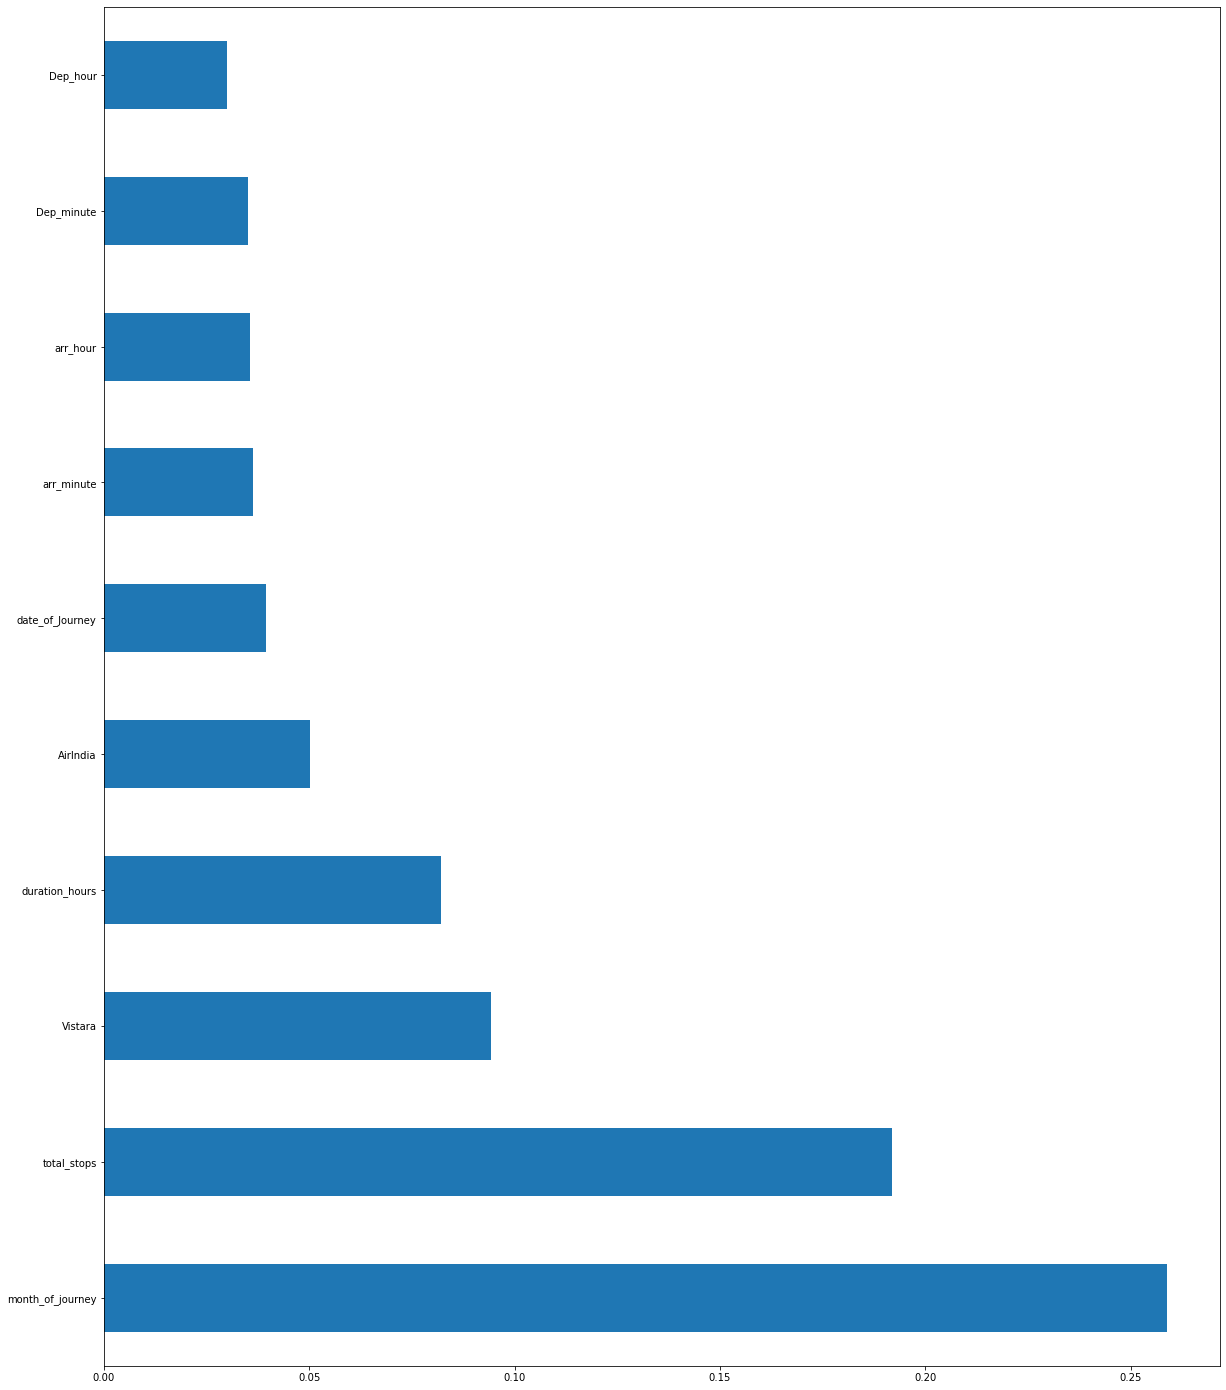

In [78]:
plt.figure(figsize=(20,25))
feature_importances=pd.Series(feature_selection.feature_importances_,index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

Top three best features for our label prediction are moth of journey,total stops and vistara flight among that, month of journey is the top best feature who contributes more for our flight price prediction.

In [79]:
#Dropping the columns which are least contributing
x.drop(columns=['TruJet','Cochin'],axis=1,inplace=True)

In [80]:
#Treating of skewness using Powertransform function.
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x   

array([[ 0.05131225,  1.38103207, -1.73076685, ..., -0.24188626,
         1.04157682, -0.02438662],
       [ 0.05131225,  1.53132853,  0.1504618 , ..., -0.24188626,
         1.04157682, -0.02438662],
       [ 0.05131225,  1.53132853,  0.1504618 , ..., -0.24188626,
         1.04157682, -0.02438662],
       ...,
       [ 1.95070659, -0.52810089,  0.62541151, ..., -0.24188626,
        -0.96008281, -0.02438662],
       [ 1.95070659, -0.52810089,  0.62541151, ..., -0.24188626,
        -0.96008281, -0.02438662],
       [ 1.95070659,  0.58141002, -1.13440282, ..., -0.24188626,
        -0.96008281, -0.02438662]])

In [81]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.05131225,  1.38103207, -1.73076685, ..., -0.24188626,
         1.04157682, -0.02438662],
       [ 0.05131225,  1.53132853,  0.1504618 , ..., -0.24188626,
         1.04157682, -0.02438662],
       [ 0.05131225,  1.53132853,  0.1504618 , ..., -0.24188626,
         1.04157682, -0.02438662],
       ...,
       [ 1.95070659, -0.52810089,  0.62541151, ..., -0.24188626,
        -0.96008281, -0.02438662],
       [ 1.95070659, -0.52810089,  0.62541151, ..., -0.24188626,
        -0.96008281, -0.02438662],
       [ 1.95070659,  0.58141002, -1.13440282, ..., -0.24188626,
        -0.96008281, -0.02438662]])

In [82]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [84]:
#importing all the required libraries to build our model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics

# Linear Regression

In [85]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))

Training_score 0.43220684209097693
Testing_score 0.3293551417950207
Mean squared error 8020381.123545448
Mean Absolute error 2154.2479513727026
RMSE 2832.027740603091


# KNeighbors Regressor

In [86]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Training_score',knn.score(x_train,y_train))
print('Testing_score',knn.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_knn)))

Training_score 0.7385957303480729
Testing_score 0.5451642732949227
Mean squared error 5439474.905605701
Mean Absolute error 2154.2479513727026
RMSE 2332.268189039524


# Decision Tree Regressor

In [87]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Training_score',dt.score(x_train,y_train))
print('Testing_score',dt.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_dt))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Training_score 0.9980344913793752
Testing_score 0.6902749157518584
Mean squared error 3704066.5991851413
Mean Absolute error 900.8784639746636
RMSE 1924.5951780011144


# Random Forest Regressor

In [88]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('Training_score',rf.score(x_train,y_train))
print('Testing_score',rf.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_rf))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Training_score 0.9740106267449888
Testing_score 0.8297508685582096
Mean squared error 2036044.716380121
Mean Absolute error 847.2410396401236
RMSE 1426.900387686583


# Support vector Regressor

In [89]:
svm=SVR()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
print('Training_score',svm.score(x_train,y_train))
print('Testing_score',svm.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_svm))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_svm))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_svm)))

Training_score 0.003161844309995332
Testing_score 0.00626861734695372
Mean squared error 11884239.960681526
Mean Absolute error 2706.449715008321
RMSE 3447.3526017339054


# Ada Boost Regressor

In [90]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print('Training_score',ab.score(x_train,y_train))
print('Testing_score',ab.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_ab))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ab)))

Training_score 0.5785171168467566
Testing_score 0.5353732329823486
Mean squared error 5556567.989884355
RMSE 2357.2373639250577


# Extreme Gradient Boost Regressor

In [91]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print('training score:',xgb.score(x_train,y_train))
print('testing score:',xgb.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_xgb))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

training score: 0.9822705755388497
testing score: 0.8244357607271635
Mean squared error 2099609.1946523166
RMSE 1449.0028276895516


# Hyper parameter Tuning

In [92]:
#getting best parameters for Linear regression
#Using Grid Search CV for finding the best Parameters
parameters={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':np.arange(0,10)}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}


In [93]:
#Hyperparameter tuning using GridSearchCV for KneighborsRegressor to find best parameters.
parameters={ 'n_neighbors' :np.arange(1,10),'weights':['uniform','distance'],'algorithm':['kd_tree','brute']}
knn=KNeighborsRegressor()
clf=GridSearchCV(knn,parameters,n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'n_neighbors': 6, 'weights': 'distance'}


In [94]:
#Hyperparameter tuning using GridSearchCV for DecisionTreeRegressor to find out best parameters.
parameters={ "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[10,20,30,40,50,60,70,80,90] }
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters,n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [95]:
#Hyperparameter tuning using GridSearchCV for RandomForestClassifier to find out best parameters.
parameters={ "max_depth":[1,3,5,7,9,11,12],"n_estimators": [10,20,30],"max_features": ["auto", "sqrt", "log2"],"min_samples_split": [2,4,8],"bootstrap":[True, False],"criterion":['mse','friedman_mse']} 
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 11, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20}


In [96]:
#Hyperparameter tuning using GridSearchCV for Ada boost regressor to find out best parameters.
parameters={'base_estimator':['object',None],'n_estimators':[10,20,30],'learning_rate':[0.1,0.2,0.3,0.4],'loss':['linear', 'square', 'exponential']}
ab=AdaBoostRegressor()
clf=GridSearchCV(ab,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'base_estimator': None, 'learning_rate': 0.4, 'loss': 'exponential', 'n_estimators': 30}


In [97]:
#Hyperparameter tuning using GridSearchCV for xg boost regressor to find out best parameters.
parameters={'n_estimators':[10,20,30], 'max_depth':np.arange(5,25), 'eta':[0.1,0.2,0.3], 'subsample':np.arange(0,1), 'colsample_bytree':np.arange(0,1)}
xgb=XGBRegressor()
clf=GridSearchCV(xgb,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'colsample_bytree': 0, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0}


# Tuning the models

In [98]:
#Linear REgression
lr=LinearRegression(copy_X= True, fit_intercept=True, n_jobs= 0, normalize=True)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))

Training_score 0.43220684209097693
Testing_score 0.32935514179502035
Mean squared error 8020381.123545452
Mean Absolute error 2154.2479513727026
RMSE 2832.027740603092


In [99]:
#KNeighbors Regressor
knn=KNeighborsRegressor(algorithm='brute', n_neighbors=8, weights='distance')
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Training_score',knn.score(x_train,y_train))
print('Testing_score',knn.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_knn)))

Training_score 0.9993406142585316
Testing_score 0.6274490986638874
Mean squared error 4455413.591977069
Mean Absolute error 2154.2479513727026
RMSE 2110.7850653197897


In [100]:
#DecisionTree Regressor
dt=DecisionTreeRegressor(max_depth= 5, max_features='auto',max_leaf_nodes=10,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Training_score',dt.score(x_train,y_train))
print('Testing_score',dt.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_dt))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Training_score 0.5215322211998707
Testing_score 0.5258378113063147
Mean squared error 5670604.077807561
Mean Absolute error 1839.791582007007
RMSE 2381.3030209966055


In [101]:
#RandomForest Regressor
rf=RandomForestRegressor(bootstrap=True,criterion='mse', max_depth=15,max_features='auto',min_samples_split=2,n_estimators=20)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('Training_score',rf.score(x_train,y_train))
print('Testing_score',rf.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_rf))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Training_score 0.9653068359627021
Testing_score 0.8017877802382696
Mean squared error 2370461.0963365193
Mean Absolute error 922.1218827752905
RMSE 1539.630181678873


In [102]:
#Adaboost Regressor
ab=AdaBoostRegressor(base_estimator= None, learning_rate=0.4,loss='exponential',n_estimators=30)
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print('Training_score',ab.score(x_train,y_train))
print('Testing_score',ab.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_ab))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_ab))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ab)))

Training_score 0.5793808257403397
Testing_score 0.5566762859063803
Mean squared error 5301800.356232312
Mean Absolute error 1841.8125949643484
RMSE 2302.563865831372


In [103]:
#ExtremeGradientboost Regressor
xgb=XGBRegressor(max_depth=30,n_estimators=20)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print('training score:',xgb.score(x_train,y_train))
print('testing score:',xgb.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_xgb))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_xgb))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

training score: 0.9975736273317024
testing score: 0.8503241216571401
Mean squared error 1790004.9103846925
Mean Absolute error 769.7450432494247
RMSE 1337.9106511216257


In [104]:
#Creating the dataframe for all models
Model=[]
Model.append(('Linear Regression',lr))
Model.append(('KNeighbors Regressor',knn))
Model.append(('DecisionTreeRegressor',dt))
Model.append(('RandomForest Regressor',rf))
Model.append(('AdaBoostRegressor',ab))
Model.append(('Extreme Gradient Boost Regressor',xgb))

In [111]:
Models=[]
Score=[]
MSE=[]
RMSE=[]
MAE=[]

for name,model in Model:
    print(name, '\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
# Model Score
    a=model.score(x_test,y_test)
    print('Model Score: ',a)
    Score.append(a*100)
    print('\n')
    
# MSE
    m=mean_squared_error(y_test,pred)
    print('MSE Score: ',m)
    MSE.append(m)
    print('\n') 
    
#MAE

    m=mean_absolute_error(y_test,pred)
    print('MAE: ',m)
    MAE.append(m)
    print('\n') 
    
# RMSE
    r=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE Score: ',r)
    RMSE.append(r)
    print('\n')

Linear Regression 

LinearRegression(n_jobs=0, normalize=True)


Model Score:  0.32935514179502035


MSE Score:  8020381.123545452


MAE:  2154.2479513727026


RMSE Score:  2832.027740603092


KNeighbors Regressor 

KNeighborsRegressor(algorithm='brute', n_neighbors=8, weights='distance')


Model Score:  0.6274490986638874


MSE Score:  4455413.591977069


MAE:  1396.1268833556396


RMSE Score:  2110.7850653197897


DecisionTreeRegressor 

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)


Model Score:  0.5258378113063147


MSE Score:  5670604.077807561


MAE:  1839.791582007007


RMSE Score:  2381.3030209966055


RandomForest Regressor 

RandomForestRegressor(max_depth=15, n_estimators=20)


Model Score:  0.8164561944732409


MSE Score:  2195038.4844978233


MAE:  898.6507854153648


RMSE Score:  1481.566226834907


AdaBoostRegressor 

AdaBoostRegressor(learning_rate=0.4, loss='exponential', n_estimators=30)

In [112]:
#Making DataFrame
pd.DataFrame({"Models":Models,"Model Score":Score,'Mean Squared Error':MSE,'Mean Absolute Error':MAE,'Root Mean Squared error':RMSE})

,Models,Model Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared error
0,Linear Regression,32.935514,8.020381e+06,2154.247951,2832.027741
1,KNeighbors Regressor,62.744910,4.455414e+06,1396.126883,2110.785065
2,DecisionTreeRegressor,52.583781,5.670604e+06,1839.791582,2381.303021
3,RandomForest Regressor,81.645619,2.195038e+06,898.650785,1481.566227
4,AdaBoostRegressor,53.115469,5.607018e+06,1929.534864,2367.914358
5,Extreme Gradient Boost Regressor,85.032412,1.790005e+06,769.745043,1337.910651


In [113]:
#getting the 15 predicted values and comapring with the test values
print(y_pred_xgb[:15])
print(y_test.values[:15])

[ 6079.623   7106.494  18032.11    1607.7745  3502.0479  8250.6045
  5929.449   6767.873   6974.72    4447.8203  4974.1504  6085.163
  5554.102   6620.4775  4156.8906]
[ 7086  7281 15426  1606  3601  8475  5954  6962  7731  4977  4503  6745
  5934  7630  3671]


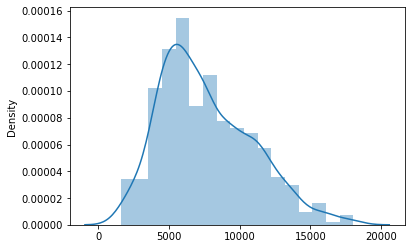

In [114]:
#Scatter plot for test data prediction
sns.distplot(y_pred_xgb)
plt.show()

The predicted values are normally distributed.

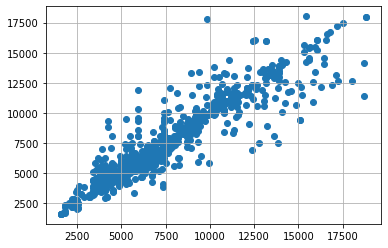

In [115]:
#Scatter plot
plt.scatter(x=y_test, y=y_pred_xgb)
plt.grid(True)

In [116]:
import joblib
joblib.dump(xgb,"Flight price prediction")

['Flight price prediction']